In [1]:
import numpy as np
from scipy.linalg import eig, inv, det

In [2]:
def matrix_properties(matrix):
    properties = {}
    properties['Determinant'] = det(matrix)
    properties['Trace'] = np.trace(matrix)
    properties['Rank'] = np.linalg.matrix_rank(matrix)
    properties['Is Symmetric'] = np.allclose(matrix, matrix.T)
    
    try:
        properties['Inverse'] = inv(matrix)
    except np.linalg.LinAlgError:
        properties['Inverse'] = "Non-invertible matrix"

    eigenvalues, eigenvectors = eig(matrix)
    properties['Eigenvalues'] = eigenvalues
    properties['Eigenvectors'] = eigenvectors
    
    return properties

# Example matrix
matrix = np.array([
    [4, 0, 2],
    [0, 3, 0],
    [2, 0, 4]
])

# Get matrix properties
props = matrix_properties(matrix)

# Print the properties
for prop, value in props.items():
    print(f"{prop}:")
    print(value, "\n")

Determinant:
36.0 

Trace:
11 

Rank:
3 

Is Symmetric:
True 

Inverse:
[[ 0.33333333  0.         -0.16666667]
 [ 0.          0.33333333 -0.        ]
 [-0.16666667  0.          0.33333333]] 

Eigenvalues:
[6.+0.j 2.+0.j 3.+0.j] 

Eigenvectors:
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]
 [ 0.70710678  0.70710678  0.        ]] 



##### Explanation:
- Determinant and Trace: Basic properties calculated directly from the matrix.
- Inverse: Computed if the matrix is non-singular (determinant is not zero).
- Eigenvalues and Eigenvectors: Obtained using the eig function, which returns both.
- Rank: The number of linearly independent rows or columns.
- Symmetry Check: Determines if the matrix is symmetric by checking if it equals its transpose.

In [3]:
import numpy as np
from numpy.linalg import eig, det, matrix_power, norm
from scipy.linalg import eigh

([[-1, 3/2]])
([[1, 1]])

([[-1, 3/2]])
([[2/3, 1]])

In [4]:
# Question 1: Matrix properties
matrices = [
    np.array([[-1, 3/2], [1, -1]]),
    np.array([[-1, 3/2], [2/3, -1]]),
    np.eye(3)  # Identity matrix 3x3
]

# Show properties of matrices
for i, matrix in enumerate(matrices):
    print(f"Matrix {i+1} determinant: {det(matrix)}")
    print(f"Matrix {i+1} eigenvalues: {eig(matrix)[0]}")
    print()

Matrix 1 determinant: -0.5
Matrix 1 eigenvalues: [ 0.22474487 -2.22474487]

Matrix 2 determinant: 0.0
Matrix 2 eigenvalues: [-1.11022302e-16 -2.00000000e+00]

Matrix 3 determinant: 1.0
Matrix 3 eigenvalues: [1. 1. 1.]



- first of all the matrix multiplication doesn't work becaue the dimentions of the identity matrix don't match the previous matrices.

In [5]:
# Question 2: Show that A^n = XΛ^nX^-1
A = np.array([[1, 1], [1, 0]])
eigenvalues, eigenvectors = eig(A)
Lambda = np.diag(eigenvalues)
n = 5  # Example power
A_n = matrix_power(A, n)
X = eigenvectors
X_inv = np.linalg.inv(X)
A_n_formulated = X @ matrix_power(Lambda, n) @ X_inv
print(f"A^n calculated: \n{A_n}")
print(f"A^n using formula: \n{A_n_formulated}")

A^n calculated: 
[[8 5]
 [5 3]]
A^n using formula: 
[[8. 5.]
 [5. 3.]]


# <center> **First Mini Project - Preliminaries </center>**

### <center>Massive Graph Management and Analytics </center>

---


---

##### <center>Authors: Benjamin Gold & Dilbar Isakova</center>
##### <center>Professor: Nacera Seghuoani</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csgraph
import networkx as nx

### Vectors and Matrices

- Here, we are using numpy to define vectors and matrices and performing operations on them
- Also, we can operate with them as we would do in linear algebra

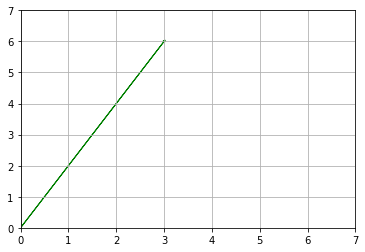

In [9]:
vector = np.array([3, 6])

# show the vector as an arrow
plt.arrow(0, 0, vector[0], vector[1], head_width=.05, head_length=0.05, color='green')
plt.axis([0, 7, 0, 7])
plt.grid()
plt.show()

In [10]:
matrix = np.array([[1, 4], [6, 1]])
print(matrix)

[[1 4]
 [6 1]]


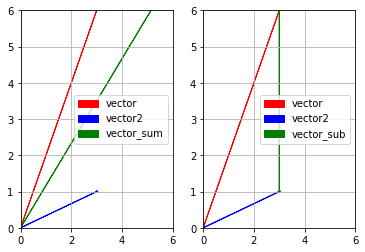

In [16]:
## vector2 = np.array([3, 1])

vector_sum = vector + vector2
vector_sub = vector - vector2

plt.subplot(1, 2, 1)
plt.arrow(0, 0, vector[0], vector[1], head_width=.05, head_length=0.05, color='red', label='vector')
plt.arrow(0, 0, vector2[0], vector2[1], head_width=.05, head_length=0.05, color='blue', label='vector2')
plt.arrow(0, 0, vector_sum[0], vector_sum[1], head_width=.05, head_length=0.05, color='green', label='vector_sum')
plt.axis([0, 6, 0, 6])
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.arrow(0, 0, vector[0], vector[1], head_width=.05, head_length=0.05, color='red', label='vector')
plt.arrow(0, 0, vector2[0], vector2[1], head_width=.05, head_length=0.05, color='blue', label='vector2')
plt.arrow(vector2[0], vector2[1], vector_sub[0], vector_sub[1], head_width=.05, head_length=0.05, color='green', label='vector_sub')
plt.axis([0, 6, 0, 6])
plt.grid()
plt.legend()

plt.show()

In [17]:
transposed = matrix.T
print(transposed)

[[1 6]
 [4 1]]


In [18]:
squared = matrix.dot(matrix)
print(squared)

[[25  8]
 [12 25]]


Other option

In [19]:
squared = matrix @ matrix
print(squared)

[[25  8]
 [12 25]]


In [20]:
inverse = np.linalg.inv(matrix)
print(inverse)

[[-0.04347826  0.17391304]
 [ 0.26086957 -0.04347826]]


or matrix @ inverse, should be identity matrix

In [21]:
check = matrix.dot(inverse)

print(check)

[[1. 0.]
 [0. 1.]]


Usually, when checking if two matrices are equal, we have to take into account that the result of the operations might not be exactly the same as the expected result due to the precision of the floating point numbers. Therefore, we have to check if the difference between the two matrices is smaller than a certain threshold.

In [22]:
# checking if check is identity matrix
print(np.isclose(check, np.eye(2)))

[[ True  True]
 [ True  True]]


In [23]:
# and, defining the precision
print(np.isclose(check, np.eye(2), atol=1e-8))

[[ True  True]
 [ True  True]]


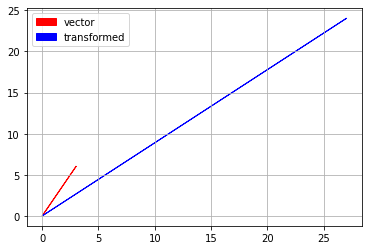

In [26]:
# vector-matrix operations

transformed = matrix.dot(vector)

plt.arrow(0, 0, vector[0], vector[1], head_width=.05, head_length=0.05, color='red', label='vector')
plt.arrow(0, 0, transformed[0], transformed[1], head_width=.05, head_length=0.05, color='blue', label='transformed')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#Matrix Norms
def compute_matrix_norms(matrix):
    frobenius_norm = np.linalg.norm(matrix, 'fro')  # Euclidean norm
    l1_norm = np.linalg.norm(matrix, 1)  # Maximum column sum
    inf_norm = np.linalg.norm(matrix, np.inf)  # Maximum row sum
    l2_norm = np.linalg.norm(matrix, 2)  # Spectral norm

    return {
        'Frobenius Norm (Euclidean)': frobenius_norm,
        'L1 Norm': l1_norm,
        'Infinity Norm': inf_norm,
        'L2 Norm (Spectral)': l2_norm
    }

#Matrix Transpose
def compute_transpose(matrix):
    return matrix.transpose()

#Matrix Determinant
def compute_determinant(matrix):
    return np.linalg.det(matrix)

#Matrix Invertable
def compute_inverse(matrix):
    if np.linalg.det(matrix) != 0:
        return np.linalg.inv(matrix)
    else:
        return None  # Matrix is singular (not invertible)

#Eigenvalues and Eigenvectors
def compute_eigen(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors

#Diagonalization
def is_diagonalizable(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    if len(np.unique(eigenvalues)) == len(eigenvalues):
        return True  # If eigenvalues are distinct, matrix is diagonalizable
    return False

#Orthogonal Matrix
def is_orthogonal(matrix):
    transpose = matrix.T
    identity_check = np.allclose(np.dot(transpose, matrix), np.eye(matrix.shape[0]))
    return identity_check

#Positive Definite Matrix
def is_positive_definite(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.all(eigenvalues > 0)  # All eigenvalues should be positive

#Laplacian Matrix (only for undirected graphs)
def compute_laplacian(adj_matrix):
    degree_matrix = np.diag(np.sum(adj_matrix, axis=1))
    laplacian_matrix = degree_matrix - adj_matrix
    return laplacian_matrix

# Example: square matrix (for testing)
A = np.array([[4, 1, 3],
              [1, 3, 1],
              [2, 1, 5]])

#Norms Check
norms = compute_matrix_norms(A)
print("Matrix Norms:")
for norm_type, norm_value in norms.items():
    print(f"{norm_type}: {norm_value}")
print()

#Transpose Check
transpose = compute_transpose(A)
print("Matrix Transpose:")
print(transpose)
print()

#Determinant Check
determinant = compute_determinant(A)
print(f"Matrix Determinant: {determinant}")
print()

#Inverse Check
inverse = compute_inverse(A)
if inverse is not None:
    print("Matrix Inverse:")
    print(inverse)
else:
    print("Matrix is Singular (Non-invertible)")
print()

#Eigenvalues and Eigenvectors Check
eigenvalues, eigenvectors = compute_eigen(A)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)
print()

#Diagonalization Check
diagonalizable = is_diagonalizable(A)
print(f"Is Diagonalizable: {diagonalizable}")
print()

#Orthogonal Matrix Check
orthogonal = is_orthogonal(A)
print(f"Is Orthogonal: {orthogonal}")
print()

#Positive Definite Matrix Check
positive_definite = is_positive_definite(A)
print(f"Is Positive Definite: {positive_definite}")
print()

#Laplacian Matrix (for graph adjacency matrix)
adj_matrix = np.array([[0, 1, 0],
                       [1, 0, 1],
                       [0, 1, 0]])  # Example adjacency matrix
laplacian = compute_laplacian(adj_matrix)
print("Laplacian Matrix:")
print(laplacian)

## Exercises
#### Question 1
- First of all, the matrix multiplication doesn't work because the dimensions of the identity matrix do not match the previous matrices. Let's then just look at the first two matrices.

In [ ]:
q1matrix1 = np.array([[-1, 3/2],
                     [1, -1]])
q1matrix2 = np.array([[-1, 3/2],
                     [2/3, -1]])
print(compute_determinant(q1matrix1))
print(compute_determinant(q1matrix2))
q1matrixmul = q1matrix1 @ q1matrix2
print(q1matrixmul)
print(compute_determinant(q1matrixmul))

- What we notice is that the first matrix is invertible, while the second matrix is singular.
- Then, when we multiply an invertible matrix and a singular matrix, we get a singular matrix.